DATA608 Project 4: How much do we ***really*** get paid?

Farhod Ibragimov.

## Introduction

I looked at how salaries and job counts changed for data-related roles across the United States between 2021 and 2024.
The dataset comes from the U.S. Bureau of Labor Statistics (BLS) and includes jobs like
 * Data Scientist
 * Statistician
 * Operations Research Analyst 
 * Database Administrator 
 * Database Architect
 * Computer & Information Research Scientist.

 So, instead of asking of '*How much do we get paid?*, I would ask it little bit more in precise way:
 * *How much do we ***really*** get paid?*

 This project consists of two parts:
 1. EDA: job market and salaries trends analysis
 2. Analysis of average nominal and Cost Of Living Index (*COLI*) adjusted salaries.

 This project uses data from the Bureau of Labor Statistics (data related jons annual wages, 2021 - 2024) and combines it with state-level COLI to estimate what salaries are really worth after accounting for local costs.

 I hope we will get a better answer of *'How much we really get paid?'*



## Part 1. EDA
In this section i did data preparation and analysis. I wouldn't go into details of EDA, since this project focused on data visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
jobs24_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2024_dl.xlsx")
jobs23_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2023_dl.xlsx")
jobs22_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2022_dl.xlsx")
jobs21_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2021_dl.xlsx")
jobs20_df = pd.read_excel("https://github.com/farhodibr/CUNY-SPS-MSDS/raw/main/DATA608/PROJECT4/state_M2020_dl.xlsx")

# jobs24_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm24st\state_M2024_dl.xlsx")
# jobs23_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm23st\state_M2023_dl.xlsx")
# jobs22_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm22st\state_M2022_dl.xlsx")
# jobs21_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm21st\state_M2021_dl.xlsx")
# jobs20_df = pd.read_excel(r"C:\Users\farho\OneDrive\CUNY_MSDS\DATA608\PROJECT4\oesm21st\state_M2020_dl.xlsx")

In [3]:
coli_df = pd.read_csv('https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT4/c2er.csv')
#coli_df.head()


In [4]:
jobs24_df.info()
#jobs24_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37609 entries, 0 to 37608
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37609 non-null  int64  
 1   AREA_TITLE    37609 non-null  object 
 2   AREA_TYPE     37609 non-null  int64  
 3   PRIM_STATE    37609 non-null  object 
 4   NAICS         37609 non-null  int64  
 5   NAICS_TITLE   37609 non-null  object 
 6   I_GROUP       37609 non-null  object 
 7   OWN_CODE      37609 non-null  int64  
 8   OCC_CODE      37609 non-null  object 
 9   OCC_TITLE     37609 non-null  object 
 10  O_GROUP       37609 non-null  object 
 11  TOT_EMP       37609 non-null  object 
 12  EMP_PRSE      37609 non-null  object 
 13  JOBS_1000     37609 non-null  object 
 14  LOC_QUOTIENT  37609 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37609 non-null  object 
 18  A_MEAN        37609 non-nu

In [5]:
#jobs23_df.info()
#jobs23_df.head()

In [6]:
#jobs22_df.info()
#jobs22_df.head()

In [7]:
#jobs21_df.info()
#jobs21_df.head()

In [8]:
#jobs20_df.info()
#jobs20_df.head()


In [9]:
def select_occ_codes(df, occ_codes = ['15-2051', '15-2041', '15-2051.01', 
                                      '15-2041', '15-2031', '15-1242', 
                                      '15-1243', '15-1211', '15-1221',
                                      '15-2099', '', '', '', '']):
    selected_jobs_df = df[df['OCC_CODE'].isin(occ_codes)]
    selected_jobs_df = selected_jobs_df[['AREA', 'AREA_TITLE',	'AREA_TYPE', 'PRIM_STATE',
                                         'NAICS','NAICS_TITLE','I_GROUP',	'OWN_CODE',	
                                         'OCC_CODE',	'OCC_TITLE','O_GROUP',	'TOT_EMP', 
                                         'JOBS_1000', 'H_MEAN','A_MEAN']]
    cols = ['AREA', 'AREA_TYPE', 'TOT_EMP', 'JOBS_1000', 'H_MEAN','A_MEAN']

    for col in cols:
        selected_jobs_df[col] = pd.to_numeric(selected_jobs_df[col], errors='coerce').astype('float')
    selected_jobs_df.columns = selected_jobs_df.columns.str.lower()
    return selected_jobs_df






In [10]:
data_jobs24_df = select_occ_codes(jobs24_df)
data_jobs23_df = select_occ_codes(jobs23_df)
data_jobs22_df = select_occ_codes(jobs22_df)
data_jobs21_df = select_occ_codes(jobs21_df)
data_jobs20_df = select_occ_codes(jobs20_df)

#data_jobs24_df.info()

In [11]:
#data_jobs24_df.occ_code.value_counts()

In [12]:
#data_jobs24_df.head()

In [13]:
def rename_cols(df, year):
    df = df[['area', 'area_title','prim_state', 'occ_code', 'occ_title', 'o_group', 'tot_emp','jobs_1000',	'h_mean',	'a_mean']]
    df  = df.rename(columns={'tot_emp':f'tot_emp_{year}',
                            'jobs_1000':f'jobs_1000_{year}',
                                'h_mean':f'h_mean_{year}',
                                'a_mean':f'a_mean_{year}'})
    return df

data_jobs24_df = rename_cols(data_jobs24_df, 24)
#display(data_jobs24_df)

In [14]:
data_jobs20_df = rename_cols(data_jobs20_df, 20)
data_jobs21_df = rename_cols(data_jobs21_df, 21)
data_jobs22_df = rename_cols(data_jobs22_df, 22)
data_jobs23_df = rename_cols(data_jobs23_df, 23)


In [15]:
#data_jobs24_df.head()

In [16]:
data_jobs_merged_df = (
    data_jobs20_df
    .merge(data_jobs21_df, how='outer')
    .merge(data_jobs22_df, how='outer')
    .merge(data_jobs23_df, how='outer')
    .merge(data_jobs24_df, how='outer')
)
#display(data_jobs_merged_df)
 

In [17]:
data_jobs_merged_df.to_csv('data_jobs_merged_df.csv', index='False')
data_jobs_merged_df.info()
#data_jobs_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          383 non-null    float64
 1   area_title    383 non-null    object 
 2   prim_state    383 non-null    object 
 3   occ_code      383 non-null    object 
 4   occ_title     383 non-null    object 
 5   o_group       383 non-null    object 
 6   tot_emp_20    192 non-null    float64
 7   jobs_1000_20  192 non-null    float64
 8   h_mean_20     189 non-null    float64
 9   a_mean_20     189 non-null    float64
 10  tot_emp_21    351 non-null    float64
 11  jobs_1000_21  351 non-null    float64
 12  h_mean_21     353 non-null    float64
 13  a_mean_21     353 non-null    float64
 14  tot_emp_22    348 non-null    float64
 15  jobs_1000_22  348 non-null    float64
 16  h_mean_22     353 non-null    float64
 17  a_mean_22     353 non-null    float64
 18  tot_emp_23    359 non-null    

In [18]:
data_jobs_merged_df.isna().sum()
data_jobs_merged_df = data_jobs_merged_df[~data_jobs_merged_df['occ_title'].isin(['Computer Systems Analysts', 'Mathematical Science Occupations, All Other', 'Computer and Information Research Scientists'])]
#data_jobs_merged_df.occ_title.unique()

In [19]:
df_count = data_jobs_merged_df.groupby('area_title')['occ_title'].count()
#df_count.head()

In [20]:
occ_values = data_jobs_merged_df['occ_title'].unique()
#print(occ_values)

def get_title_mean_salary(df):
    mean_salaries = []
    
    for title in occ_values:
        title_db = df[df['occ_title'] == title]
        salary_mean_cols = title_db.filter(like='a_mean')
        dba_mean = salary_mean_cols.mean(axis=0)
        dba_mean['occ_title'] = title

        mean_salaries.append(dba_mean)

    mean_salaries = pd.DataFrame(mean_salaries).set_index('occ_title').round(2)
    return mean_salaries

mean_salaries = get_title_mean_salary(data_jobs_merged_df)
#display(data_scientists_db)

mean_salaries = mean_salaries.reset_index(drop=False)
display(mean_salaries)
#mean_salaries.info()

,occ_title,a_mean_20,a_mean_21,a_mean_22,a_mean_23,a_mean_24
0,Database Administrators,NaN,90149.23,95223.73,97760.77,99210.96
1,Database Architects,NaN,111584.58,121681.49,126080.00,130272.29
2,Operations Research Analysts,85588.60,85422.55,87358.63,90896.40,94032.40
3,Statisticians,86784.47,88477.45,92629.57,96014.80,98981.25
4,Data Scientists,NaN,97807.55,102146.40,109313.08,110152.55


In [21]:
mean_salaries_melted = mean_salaries.melt(id_vars='occ_title', var_name='year', value_name='salary')
mean_salaries_melted['year'] = mean_salaries_melted['year'].str.extract('(\d+)$').astype(int)
mean_salaries_melted['year'] = mean_salaries_melted['year'] + 2000
mean_salaries_melted  = mean_salaries_melted[mean_salaries_melted['year'] != 2020]
mean_salaries_melted.head()

,occ_title,year,salary
5,Database Administrators,2021,90149.23
6,Database Architects,2021,111584.58
7,Operations Research Analysts,2021,85422.55
8,Statisticians,2021,88477.45
9,Data Scientists,2021,97807.55


In [22]:
def get_title_jobs_totals(df):
    total_jobs = []

    for title in occ_values:
        title_df =  df[df['occ_title'] == title]
        jobs_cols_df = title_df.filter(like='tot_emp')
        jobs_totals = jobs_cols_df.sum(axis=0)
        jobs_totals['occ_title'] = title

        total_jobs.append(jobs_totals)

    total_jobs_df = pd.DataFrame(total_jobs).set_index('occ_title')
    return total_jobs_df

totals_jobs_df = get_title_jobs_totals(data_jobs_merged_df)
#display(totals_jobs_df)


In [23]:
total_jobs_states_df = data_jobs_merged_df.groupby('area_title')[['tot_emp_20', 'tot_emp_21', 'tot_emp_22', 'tot_emp_23', 'tot_emp_24' ]].agg('sum')

#total_jobs_states_df.head()
#total_jobs_states_df.info()
#total_jobs_states_df.head()

In [24]:
total_jobs_states_df['tot_emp_change'] = total_jobs_states_df.apply(lambda x: x['tot_emp_24'] - x['tot_emp_20'], axis=1)
#total_jobs_states_df.head()

In [25]:

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.grid'] = False
sns.set_style("white")


### Salary Growth Over Time (2021–2024)

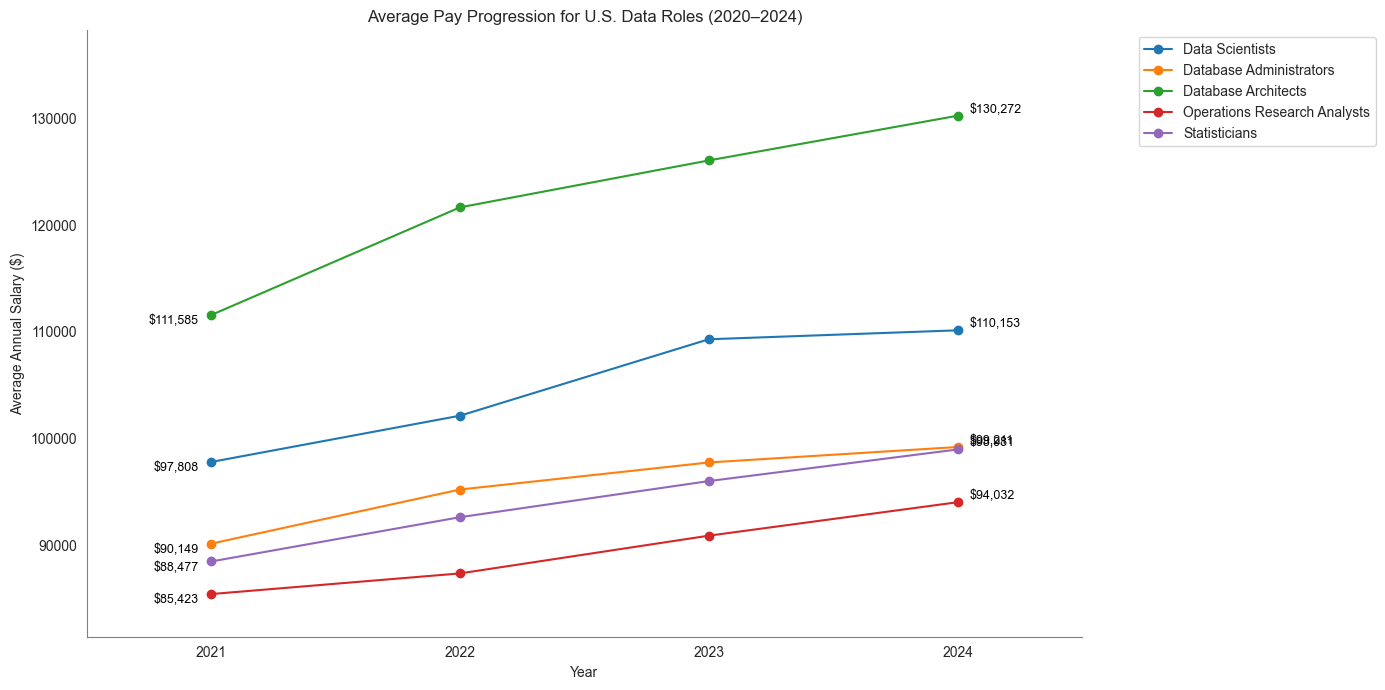

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot each job category ---
for name, group in mean_salaries_melted.groupby('occ_title'):
    ax.plot(group['year'], group['salary'], marker='o', label=name)

# --- Styling ---
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Pay Progression for U.S. Data Roles (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary ($)')
plt.xticks(sorted(mean_salaries_melted['year'].unique().astype(int)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# --- Add salary labels (start and end) ---
offset = 2000  # vertical offset between labels to avoid overlap
for occ in mean_salaries_melted['occ_title'].unique():
    subset = mean_salaries_melted[mean_salaries_melted['occ_title'] == occ]
    subset = subset.sort_values('year')

    # safely get start and end points
    if subset.shape[0] > 0:
        x_start, y_start = subset.iloc[0]['year'], subset.iloc[0]['salary']
        x_end, y_end = subset.iloc[-1]['year'], subset.iloc[-1]['salary']

        ax.text(x_start - 0.05, y_start - 0.1, f"${y_start:,.0f}",
                va='top', ha='right', fontsize=9, color='black')
        ax.text(x_end + 0.05, y_end + 0.1, f"${y_end:,.0f}",
                va='bottom', ha='left', fontsize=9, color='black')

# --- Add a little padding so labels don't touch axes ---
plt.xlim(mean_salaries_melted['year'].min() - 0.5, mean_salaries_melted['year'].max() + 0.5)
plt.ylim(mean_salaries_melted['salary'].min() - 4000, mean_salaries_melted['salary'].max() + 8000)

plt.tight_layout()
plt.show()


I looked at how pay evolved for each role year by year.
Each line shows the average salary from 2020 through 2024, and I labeled the starting and ending points to show how each changed.

Almost every data job saw a steady climb — Data Scientists and Database Architects led the pack, crossing well over $110K by 2024.
Statisticians rose slower but steady, while Database Administrators stayed relatively flat, maybe signaling more competition or automation.
The small year-to-year jumps reflect market maturity — not a bubble, just stable demand. 

Overall, the direction’s consistent: upward.


## Interactive Occupation View

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

df = data_jobs_merged_df.copy()
df = df[['area_title', 'prim_state', 'occ_title', 'a_mean_24', 'tot_emp_24']].dropna()


x_thr = df['tot_emp_24'].quantile(0.6)
y_thr = df['a_mean_24'].quantile(0.6)

fig = go.Figure()

occupations = df['occ_title'].unique()
color_seq = px.colors.qualitative.Set2 * 3  
symbols = ['circle', 'diamond', 'square', 'x', 'triangle-up', 'triangle-down', 'star']

for i, occ in enumerate(occupations):
    sub_df = df[df['occ_title'] == occ]
    fig.add_scatter(
        x=sub_df['tot_emp_24'],
        y=sub_df['a_mean_24'],
        mode="markers+text",  
        name=occ,
        text=None, 
        textposition="top center",
        marker=dict(
            size=9,
            color=color_seq[i % len(color_seq)],
            symbol=symbols[i % len(symbols)],
            line=dict(width=1, color="white")
        ),
        customdata=np.stack(
            (sub_df['occ_title'], sub_df['prim_state'], sub_df['a_mean_24'], sub_df['tot_emp_24']),
            axis=-1
        ),
        hovertemplate="<b>%{customdata[0]}</b><br>State: %{customdata[1]}<br>"
                      "Salary: <b>$%{customdata[2]:,.0f}</b><br>"
                      "Employment: %{customdata[3]:,.0f}<extra></extra>",
    )

dropdown_buttons = []

for i, occ in enumerate(occupations):
    visible = [j == i for j in range(len(occupations))]
    text_list = [df[df['occ_title'] == occ]['prim_state'] if j == i else None for j in range(len(occupations))]
    dropdown_buttons.append(
        dict(
            method="update",
            label=occ,
            args=[{"visible": visible, "text": text_list},
                  {"title": f"“Where’s the Best States to Work? Quadrants of Pay and Demand in {occ} position"}]
        )
    )

dropdown_buttons.insert(
    0,
    dict(
        method="update",
        label="Show All",
        args=[
            {"visible": [True] * len(occupations), "text": [None] * len(occupations)},
            {"title": "Do Bigger Job Markets Pay More? (All Occupations)"}
        ]
    )
)

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.995,
        y=0.77,
        xanchor="left",
        yanchor="middle",
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="lightgrey"
    )]
)


fig.add_vline(x=x_thr, line=dict(color="grey", width=1.7, dash="dot"))
fig.add_hline(y=y_thr, line=dict(color="grey", width=1.7, dash="dot"))

fig.add_annotation(xref="x domain", yref="y domain", x=0.09, y=0.97,
                   text="Low Employment / High Pay", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.97, y=0.97,
                   text="High Pay / High Employment", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.09, y=0.03,
                   text="Low Pay / Low Employment", showarrow=False, font=dict(color="grey", size=12))
fig.add_annotation(xref="x domain", yref="y domain", x=0.97, y=0.03,
                   text="High Employment / Low Pay", showarrow=False, font=dict(color="grey", size=12))

fig.add_annotation(
    xref="paper", yref="paper",
    x=0, y=1.03,
    text=(
        "Note: Vertical line = 60th percentile of total employment (lower vs higher demand roles); "
        "horizontal line = 60th percentile of average salary (lower vs higher pay)."
    ),
    showarrow=False,
    font=dict(size=11, color="rgba(90,90,90,0.9)", family="Arial"),
    align="center"
)

fig.update_xaxes(type="log", title="Total Employment (log scale)", showgrid=False)
fig.update_yaxes(title="Average Annual Salary ($)",showgrid=False)

fig.update_layout(
    width=1300,
    height=750,
    template="plotly_white",
    font=dict(color="grey"),
    showlegend=True,
    legend_title_text="Occupation",
    title='Mapping Data Jobs by Pay and Market Size — A Quadrant View (2024)',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="right",
        x=1.22,
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="lightgrey",
        borderwidth=1
    ),
    margin=dict(l=40, r=200, t=80, b=60),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_color="black",
        bordercolor="lightgrey"
    )
)

fig.show()


Next, I built an interactive scatter where you can choose each occupation separately.
Once you pick one job (let's say, Data Scientist), you’ll see only those points — each labeled by state abbreviation for clarity.
When you switch to “Show All,” the map resets to compare everything at once.

The interesting part is how the chart behaves differently for each job.
For Database Administrators, demand is more scattered — pay doesn’t rise much with job volume.
But for Operations Research Analysts, it’s a tighter trend — more jobs doesn't equal to higher pay. Data Architects gets paid well above $110K in almost all states.
That suggests some roles have stronger correlation between employment scale and pay reward, while others flatten out.

The quadrant lines help us visually see this balance — a reminder that growth in headcount doesn’t guarantee higher salaries.


In [28]:
df.head()

,area_title,prim_state,occ_title,a_mean_24,tot_emp_24
2,Alabama,AL,Database Administrators,92930.0,1990.0
3,Alabama,AL,Database Architects,117510.0,310.0
4,Alabama,AL,Operations Research Analysts,118370.0,500.0
5,Alabama,AL,Statisticians,76870.0,200.0
6,Alabama,AL,Data Scientists,102970.0,1620.0


## Top 10 States by Median Data Job Salary (2024)

C:\Users\farho\AppData\Local\Temp\ipykernel_18632\2608961833.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




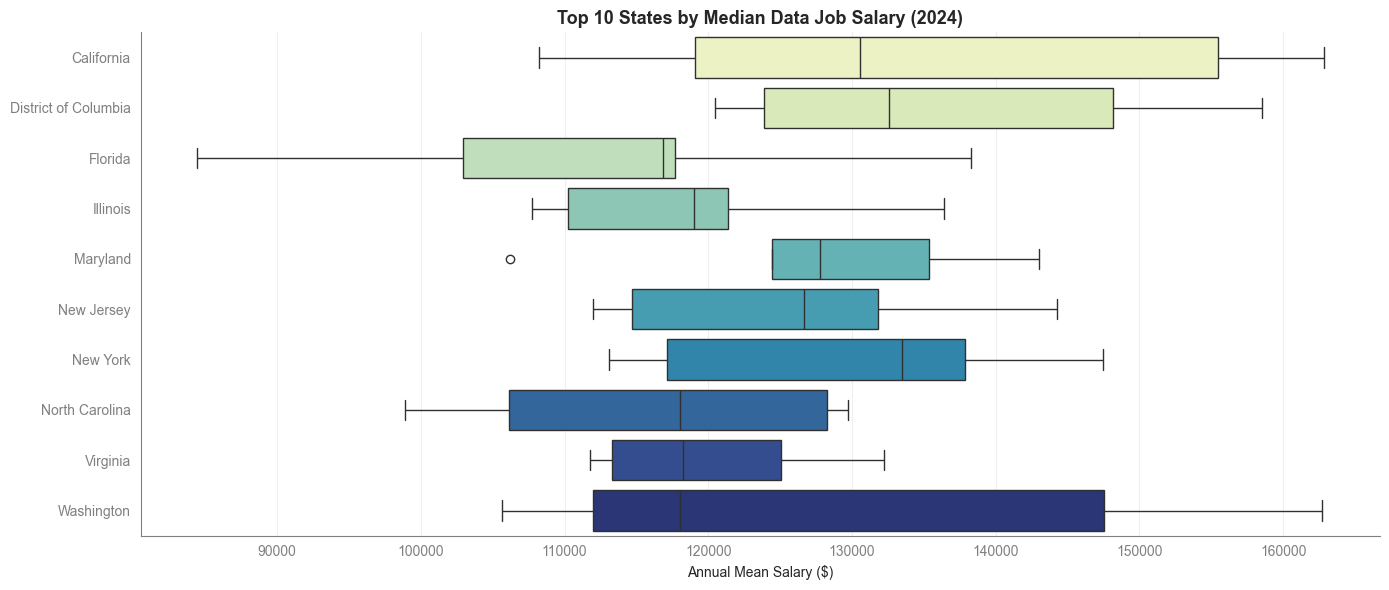

In [29]:
top_states = data_jobs_merged_df.groupby('area_title')['a_mean_24'].median().nlargest(10).index
subset = data_jobs_merged_df[data_jobs_merged_df['area_title'].isin(top_states)]

plt.figure(figsize=(14,6))
sns.boxplot(data=subset, y='area_title', x='a_mean_24',
            palette='YlGnBu', linewidth=1)
plt.title("Top 10 States by Median Data Job Salary (2024)", fontsize=13, weight='bold')
plt.xlabel("Annual Mean Salary ($)")
plt.ylabel("")
plt.grid(axis='x', alpha=0.3)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()


Here I looked at how much data jobs pay across the top-earning states in 2024. Each box shows the salary range (spread between lower-paid and higher-paid roles), with the line inside showing the median.

A few things stand out right away:

* California clearly dominates, both in median and range: meaning not only higher pay but also bigger spread between job levels. Probably because California’s data jobs include everything from startup analysts to senior AI engineers.

* Washington is right behind, because of tech-heavy companies located in state paying above 140K median.

* DC and Maryland pay strong too: probably because of federal data contracts and goverment research work driving those wages.

* States like Florida and North Carolina are catching up, but their spreads are tighter meaning less variation.

What’s interesting is that big states (CA, NY) have large salary variation, but smaller ones (like MD or VA) pay more evenly. So while tech giants drive high outliers, policy-driven or research-based states keep things consistent.

This doesn’t really prove which state is best, just that where there’s tech or federal funding, data jobs tend to cluster at higher pay. But it also shows that location still matters: remote or not.

## Distribution of Average Annual Salaries in 2024

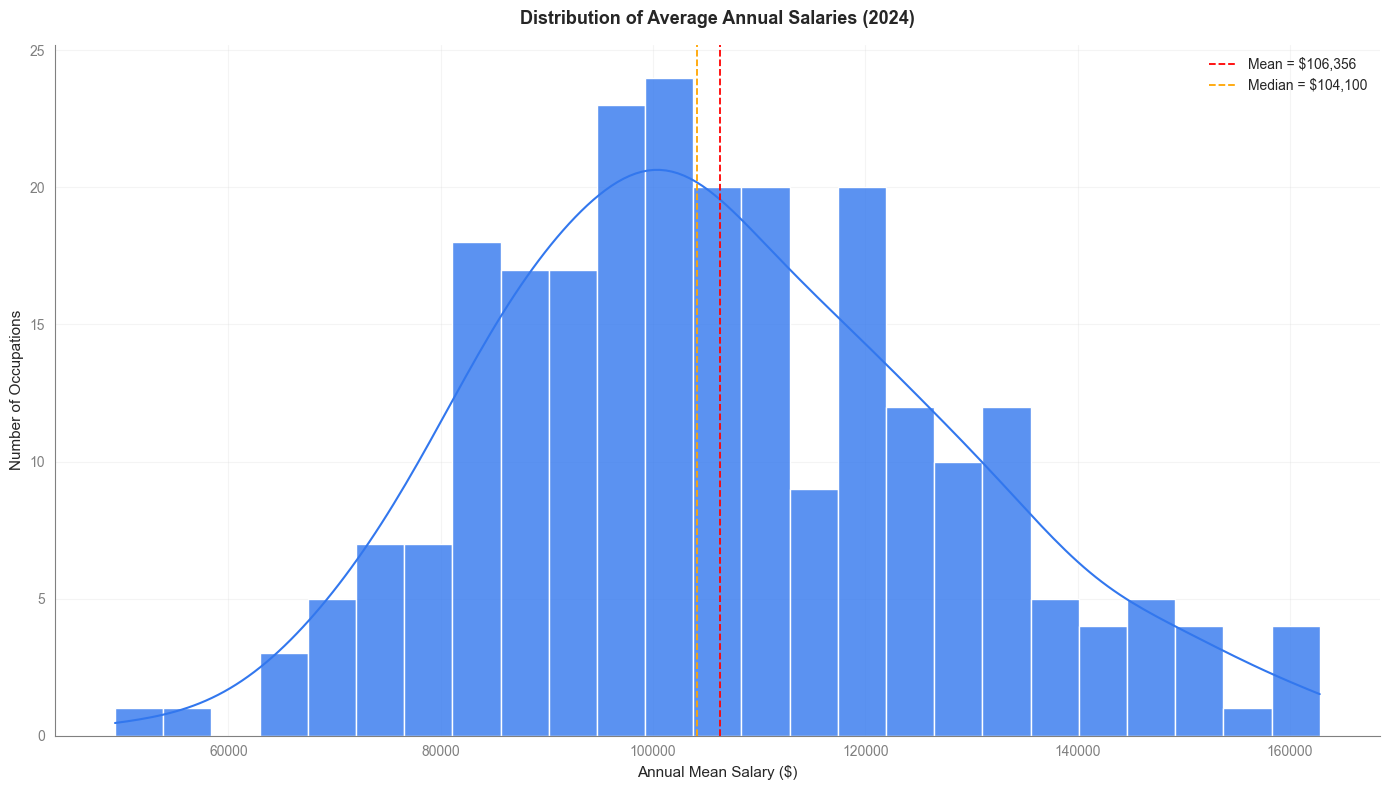

In [30]:
plt.figure(figsize=(14, 8))
sns.histplot(data_jobs_merged_df['a_mean_24'].dropna(), bins=25, kde=True,
             color="#3277ee", edgecolor='white', alpha=0.8)

mean_val = data_jobs_merged_df['a_mean_24'].mean()
median_val = data_jobs_merged_df['a_mean_24'].median()
plt.axvline(mean_val, color='red', linestyle='--', lw=1.3, label=f"Mean = ${mean_val:,.0f}")
plt.axvline(median_val, color='orange', linestyle='--', lw=1.3, label=f"Median = ${median_val:,.0f}")

plt.title("Distribution of Average Annual Salaries (2024)", pad=15, fontsize=13, weight='bold')
plt.xlabel("Annual Mean Salary ($)", fontsize=11)
plt.ylabel("Number of Occupations", fontsize=11)
plt.legend(frameon=False)
plt.grid(alpha=0.2)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()

This chart is a  summary of how data-related salaries distribute across occupations in 2024.
It’s roughly bell-shaped but leans slightly right — meaning most jobs fall around the $90k–$115k range, with a few high-paying outliers stretching beyond $150k.

You can see that the mean ($106k) is a bit higher than the median ($104k), which tells that a handful of top-earning roles (like architects or senior data scientists) are pulling the average up. In short — most data pros cluster around six-figure salaries, but there’s a long tail of very lucrative roles at the high end.

In [31]:
#data_jobs_merged_df.occ_title.unique()

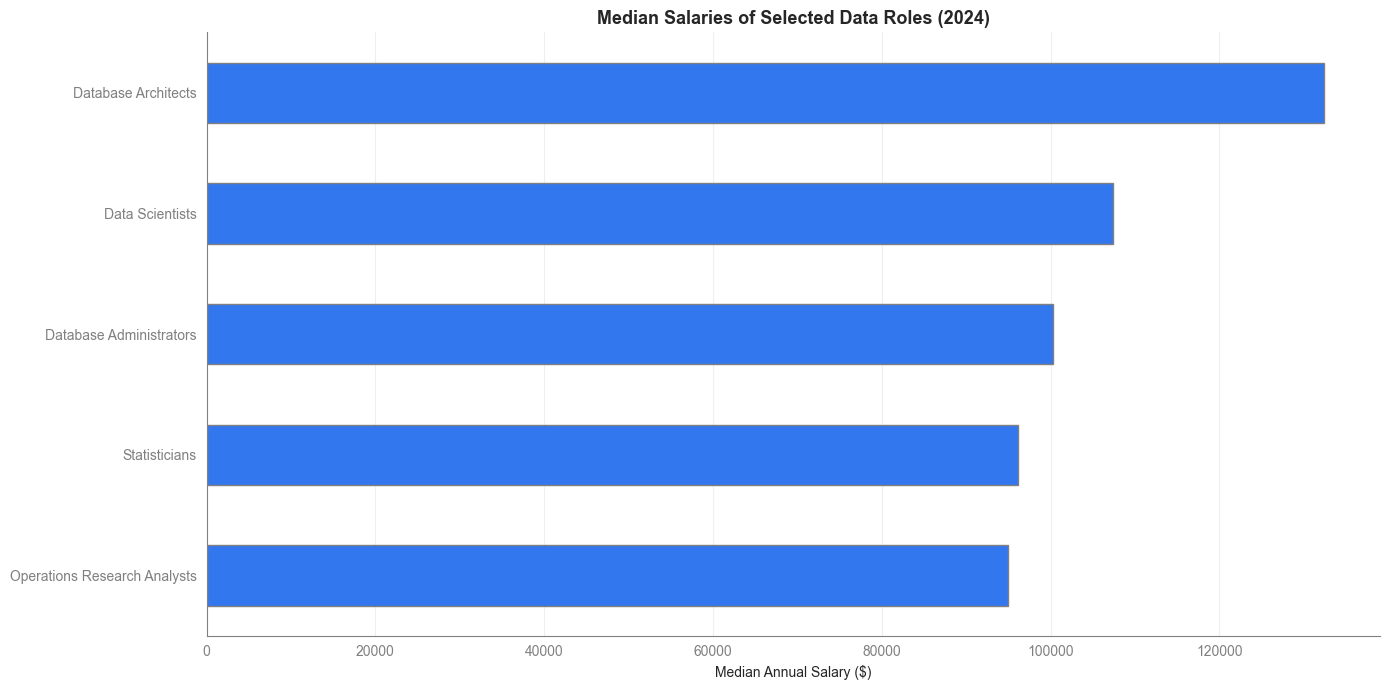

In [32]:
selected_roles = data_jobs_merged_df.occ_title.unique()

subset = data_jobs_merged_df[data_jobs_merged_df['occ_title'].isin(selected_roles)]

# Order by median salary for visual clarity
order = subset.groupby('occ_title')['a_mean_24'].median().sort_values().index

median_salaries = (
    data_jobs_merged_df[data_jobs_merged_df['occ_title'].isin(selected_roles)]
    .groupby('occ_title')['a_mean_24']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14,7))
median_salaries.plot(kind='barh', color='#3277ee', edgecolor='grey')
plt.title("Median Salaries of Selected Data Roles (2024)", fontsize=13, weight='bold')
plt.xlabel("Median Annual Salary ($)")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
ax = plt.gca() 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

ax.tick_params(colors='grey')
plt.tight_layout()
plt.show()




In [33]:
coli_df.columns = coli_df.columns.str.lower()
coli_df.state = coli_df.state.str.replace('\xa0', '', regex=False).str.strip()
coli_df.state.values
merged_jobs_coli = pd.merge(data_jobs_merged_df, coli_df[['state', 'index']], left_on='area_title', right_on='state', how='left' )
#display(merged_jobs_coli)


In [34]:
merged_jobs_coli = merged_jobs_coli.dropna(subset=['index'])
#merged_jobs_coli.info()

In [35]:
df_jobs_coli24 = merged_jobs_coli[['area_title', 'prim_state', 'occ_title', 'a_mean_24', 'tot_emp_24', 'index']]
df_jobs_coli24['a_mean_24_adj'] = round((df_jobs_coli24.a_mean_24 / df_jobs_coli24['index']) * 100)
#display(df_jobs_coli24)


C:\Users\farho\AppData\Local\Temp\ipykernel_18632\478271636.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
state_avg = (df_jobs_coli24
    .groupby('area_title', as_index=False)
    .agg({'a_mean_24':'mean', 'a_mean_24_adj':'mean'})
    .dropna()
)

state_avg = state_avg.sort_values('a_mean_24', ascending=False)

melted_states = state_avg.melt(
    id_vars='area_title',
    value_vars=['a_mean_24', 'a_mean_24_adj'],
    var_name='Salary_Type',
    value_name='Salary'
)

melted_states['Salary_Type'] = melted_states['Salary_Type'].replace({
    'a_mean_24': 'Nominal Salary',
    'a_mean_24_adj': 'COLI-Adjusted Salary'
})



In [37]:
state_sorted = state_avg.sort_values('a_mean_24', ascending=False)

state_focus = pd.concat([
    state_sorted.head(10),
    state_sorted.tail(10)
])



## Part 2
## The Real Value of Pay: How Cost of Living Reshapes Salary Rankings Across U.S. States

Nominal salary alone can be misleading. A $110K annual salary in one state might buy far less than an $85K income somewhere else.
To make a fair comparison, we need to adjust earnings by how expensive it is to live in each state. That’s where the Cost of Living Index (COLI) becomes one of the key factors - a measure that reflects relative prices for housing, food, transportation, and other everyday costs.

The goal is to find out how much we really get paid in each state adjusted for reality. COLI adjustments helps us to get a better understang of earned salaries real purchasing power. 

### How Cost of Living Index (COLI) adjusted earnings calculated

The dataset includes mean annual wages for data-related occupations in each U.S. state.  
Both **nominal** (unadjusted) and **COLI-adjusted** salaries were calculated.

The adjustment formula: 

$$
\text{Adjusted Salary} = \frac{\text{Nominal Salary}}{\text{COLI Index}} \times 100
$$

Values above 100 in COLI indicate higher costs of living; values below 100 indicate lower costs.

The table below shows example of COLI indexes


In [38]:
coli_df.head()

,rank,state,index,grocery,housing,utilities,transportation,health,misc.
0,1,Oklahoma,86.0,95.3,70.7,95.4,89.6,94.0,90.2
1,2,Mississippi,87.3,96.3,72.8,88.9,89.2,96.8,93.0
2,3,West Virginia,88.3,96.7,71.5,93.2,96.6,93.4,94.5
3,4,Alabama,88.6,97.7,70.8,99.6,91.1,91.0,95.6
4,5,Kansas,88.8,95.5,76.1,98.9,91.3,96.3,92.2


Let's take a look at the chart to compare **nominal** and **COLI-adjusted** wages for the *top and bottom 10 states*.  We also look at which states has highest real COLI-adjusted salary, biggest loser and gainer after adjustments for these *top and bottom 10 states*

Each arrow shows how the value shifts once cost of living is accounted for.

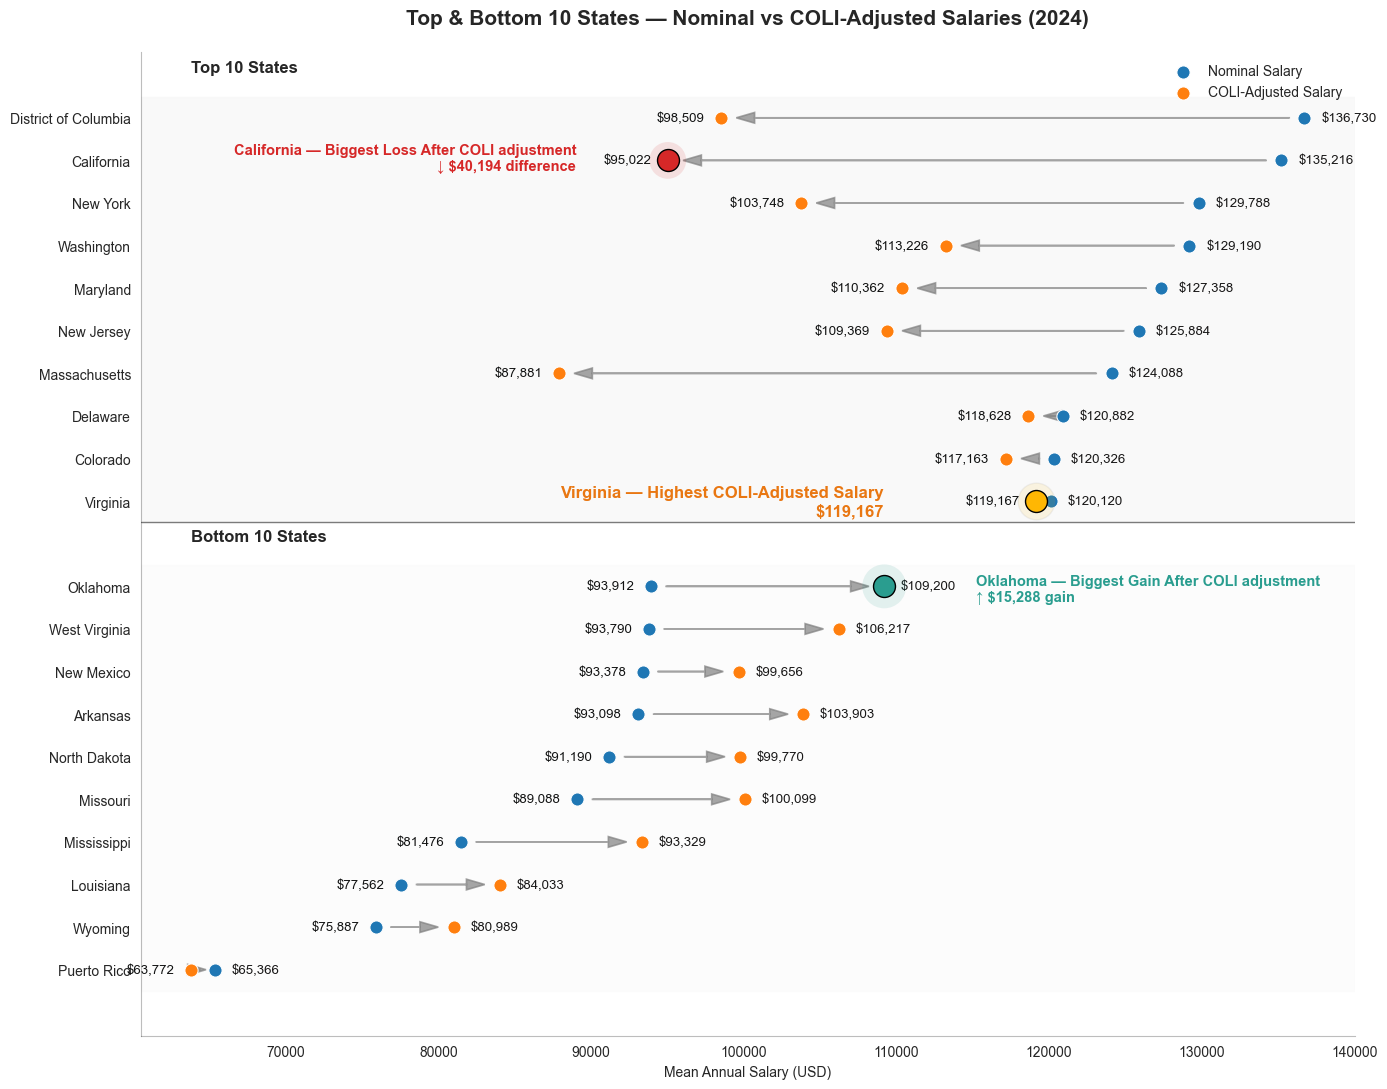

In [39]:
state_sorted = state_avg.sort_values('a_mean_24', ascending=False)
top10 = state_sorted.head(10).assign(Group='Top 10 States')
bottom10 = state_sorted.tail(10).assign(Group='Bottom 10 States')

top10['Order'] = range(20, 10, -1)
bottom10['Order'] = range(9, -1, -1)
gap_line_y = 10.5
state_focus = pd.concat([top10, bottom10])
state_focus['loss_amount'] = state_focus['a_mean_24'] - state_focus['a_mean_24_adj']
state_focus['diff'] = state_focus['a_mean_24_adj'] - state_focus['a_mean_24']

plt.figure(figsize=(14, 11))
sns.set_style('white')

plt.axhspan(10.5, 20.5, color='#f2f2f2', alpha=0.4)
plt.axhspan(-0.5, 9.5, color='#f9f9f9', alpha=0.4)

for _, row in state_focus.iterrows():
    gap = 1000  

    if row['a_mean_24_adj'] > row['a_mean_24']:
        x_start = row['a_mean_24'] + gap
        x_end = row['a_mean_24_adj'] - gap
    else:
        x_start = row['a_mean_24'] - gap
        x_end = row['a_mean_24_adj'] + gap

    dx = x_end - x_start

    if abs(dx) > 0:
        plt.arrow(x_start, row['Order'], dx, 0,
                  color='gray', alpha=0.7, lw=1.2,
                  length_includes_head=True,
                  head_width=0.25, head_length=1200)


sns.scatterplot(data=state_focus, x='a_mean_24', y='Order',
                color="#1f77b4", s=90, label='Nominal Salary', zorder=3)
sns.scatterplot(data=state_focus, x='a_mean_24_adj', y='Order',
                color="#ff7f0e", s=90, label='COLI-Adjusted Salary', zorder=3)

xmin = min(state_focus['a_mean_24'].min(), state_focus['a_mean_24_adj'].min())
xmax = max(state_focus['a_mean_24'].max(), state_focus['a_mean_24_adj'].max())
pad = 0.015 * (xmax - xmin)
plt.xlim(xmin - 3*pad, xmax + 3*pad)

for i, row in state_focus.iterrows():
    y = row['Order']
    x_left = min(row['a_mean_24'], row['a_mean_24_adj'])
    x_right = max(row['a_mean_24'], row['a_mean_24_adj'])

    plt.text(x_left - pad, y, f"${x_left:,.0f}", color="#121313",
             ha='right', va='center', fontsize=9.5)
 
    plt.text(x_right + pad, y, f"${x_right:,.0f}", color="#191818",
             ha='left', va='center', fontsize=9.5)

plt.axhline(y=gap_line_y, color='black', lw=1, alpha=0.5)
plt.text(xmin, gap_line_y + 10.5, "Top 10 States",
         fontsize=12, weight='bold', va='bottom', ha='left')
plt.text(xmin, gap_line_y - 0.5, "Bottom 10 States",
         fontsize=12, weight='bold', va='bottom', ha='left')

plt.yticks(state_focus['Order'], state_focus['area_title'])
plt.title('Top & Bottom 10 States — Nominal vs COLI-Adjusted Salaries (2024)',
          fontsize=15, weight='bold', pad=20)
plt.xlabel('Mean Annual Salary (USD)')
plt.ylabel('')
plt.legend(title='', loc='upper right', frameon=False)

ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

winner = state_focus.loc[state_focus['a_mean_24_adj'].idxmax()]

plt.scatter(winner['a_mean_24_adj'], winner['Order'],
            s=250, edgecolor='black', facecolor='#ffb703', zorder=6)

plt.text(winner['a_mean_24_adj'] - 10000, winner['Order'],
         f"{winner['area_title']} — Highest COLI-Adjusted Salary\n${winner['a_mean_24_adj']:,.0f}",
         color="#e97712", fontsize=12, fontweight='bold', ha='right', va='center')

plt.scatter(winner['a_mean_24_adj'], winner['Order'],
            s=700, facecolor='#ffb703', alpha=0.1, edgecolor='grey', zorder=5)

biggest_loss = state_focus.loc[state_focus['loss_amount'].idxmax()]
plt.scatter(biggest_loss['a_mean_24_adj'], biggest_loss['Order'],
            s=250, edgecolor='black', facecolor='#d62828', zorder=6)
plt.text(biggest_loss['a_mean_24_adj'] - 6000, biggest_loss['Order'] - 0.3,
         f"{biggest_loss['area_title']} — Biggest Loss After COLI adjustment\n↓ ${biggest_loss['loss_amount']:,.0f} difference",
         color='#d62828', fontsize=10.5, fontweight='bold', ha='right', va='bottom')
plt.scatter(biggest_loss['a_mean_24_adj'], biggest_loss['Order'],
            s=700, facecolor='#d62828', alpha=0.12, edgecolor='none', zorder=5)

biggest_gain = state_focus.loc[state_focus['diff'].idxmax()]
plt.scatter(biggest_gain['a_mean_24_adj'], biggest_gain['Order'],
            s=250, edgecolor='black', facecolor='#2a9d8f', zorder=6)
plt.text(biggest_gain['a_mean_24_adj'] + 6000, biggest_gain['Order'] + 0.3,
         f"{biggest_gain['area_title']} — Biggest Gain After COLI adjustment\n↑ ${biggest_gain['diff']:,.0f} gain",
         color='#2a9d8f', fontsize=10.5, fontweight='bold', ha='left', va='top')
plt.scatter(biggest_gain['a_mean_24_adj'], biggest_gain['Order'],
            s=1000, facecolor='#2a9d8f', alpha=0.12, edgecolor='none', zorder=5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

plt.tight_layout()
plt.show()



Now, let's take a look at a full picture - all **nominal** and **COLI-adjusted** wages for each state. 

The states ranked from highest *nominal* average salaries to lowest.

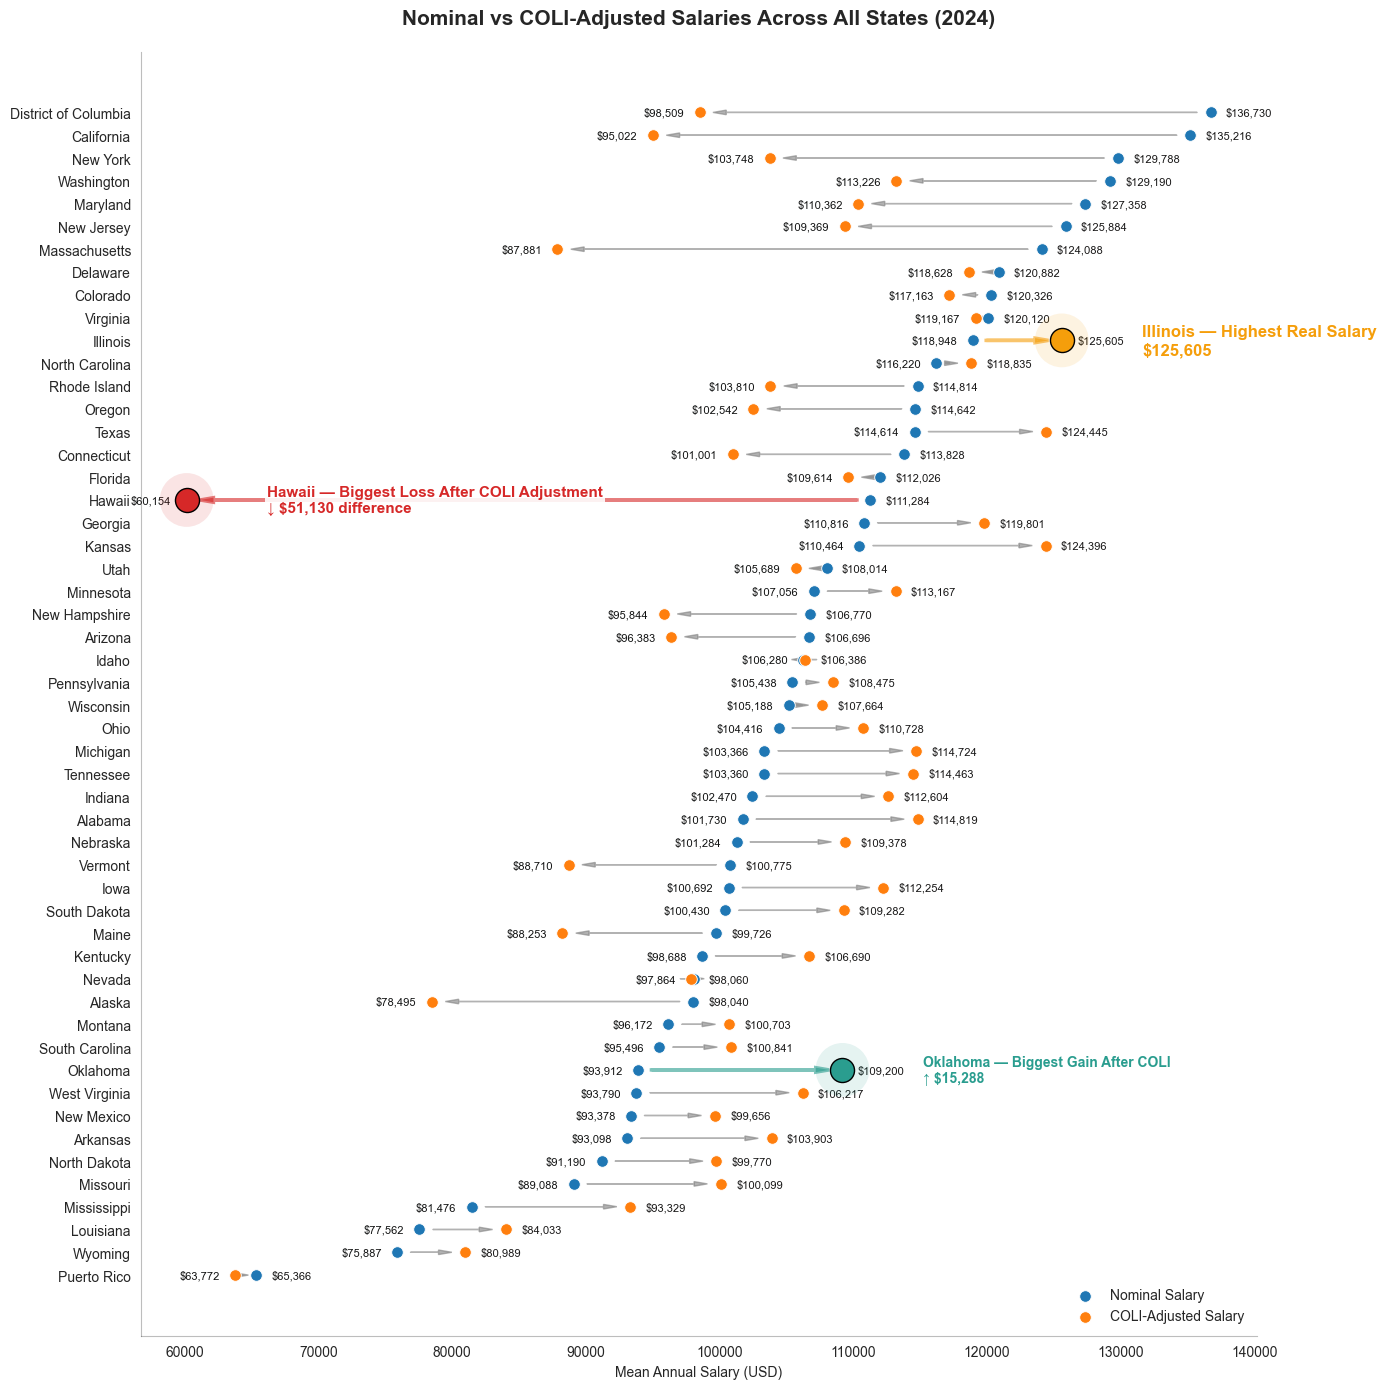

In [40]:
state_sorted = state_avg.sort_values('a_mean_24', ascending=False).reset_index(drop=True)
state_sorted['Order'] = range(len(state_sorted)-1, -1, -1)  
state_sorted['loss_amount'] = state_sorted['a_mean_24'] - state_sorted['a_mean_24_adj']
state_sorted['diff'] = state_sorted['a_mean_24_adj'] - state_sorted['a_mean_24']

winner = state_sorted.loc[state_sorted['a_mean_24_adj'].idxmax()]    
biggest_loss = state_sorted.loc[state_sorted['loss_amount'].idxmax()]  
biggest_gain = state_sorted.loc[state_sorted['diff'].idxmax()]      
highlight_states = [winner['area_title'], biggest_loss['area_title'], biggest_gain['area_title']]

color_winner = '#f59e0b'  
color_loss = '#d62828'   
color_gain = '#2a9d8f'  

def glow_marker(x, y, color, size=300, glow=1500, alpha=0.12):
    plt.scatter(x, y, s=glow, facecolor=color, alpha=alpha, edgecolor='none', zorder=4)
    plt.scatter(x, y, s=size, edgecolor='black', facecolor=color, zorder=6)

fig_height = max(14, len(state_sorted) * 0.25)
plt.figure(figsize=(14, fig_height))
sns.set_style('white')

for _, row in state_sorted.iterrows():
    gap = 1000
    if row['a_mean_24_adj'] > row['a_mean_24']:
        x_start = row['a_mean_24'] + gap
        x_end = row['a_mean_24_adj'] - gap
    else:
        x_start = row['a_mean_24'] - gap
        x_end = row['a_mean_24_adj'] + gap
    dx = x_end - x_start

    if row['area_title'] == winner['area_title']:
        arrow_color, lw = color_winner, 2.5
    elif row['area_title'] == biggest_loss['area_title']:
        arrow_color, lw = color_loss, 2.5
    elif row['area_title'] == biggest_gain['area_title']:
        arrow_color, lw = color_gain, 2.5
    else:
        arrow_color, lw = 'gray', 1.0

    plt.arrow(x_start, row['Order'], dx, 0,
              color=arrow_color, alpha=0.6, lw=lw,
              length_includes_head=True, head_width=0.2, head_length=1000)

sns.scatterplot(data=state_sorted, x='a_mean_24', y='Order',
                color="#1f77b4", s=70, label='Nominal Salary', zorder=3)
sns.scatterplot(data=state_sorted, x='a_mean_24_adj', y='Order',
                color="#ff7f0e", s=70, label='COLI-Adjusted Salary', zorder=3)

xmin = min(state_sorted['a_mean_24'].min(), state_sorted['a_mean_24_adj'].min())
xmax = max(state_sorted['a_mean_24'].max(), state_sorted['a_mean_24_adj'].max())
pad = 0.015 * (xmax - xmin)
plt.xlim(xmin - 3*pad, xmax + 3*pad)

for _, row in state_sorted.iterrows():
    y = row['Order']
    x_left = min(row['a_mean_24'], row['a_mean_24_adj'])
    x_right = max(row['a_mean_24'], row['a_mean_24_adj'])
    plt.text(x_left - pad, y, f"${x_left:,.0f}", color="#121313",
             ha='right', va='center', fontsize=8)
    plt.text(x_right + pad, y, f"${x_right:,.0f}", color="#191818",
             ha='left', va='center', fontsize=8)

glow_marker(winner['a_mean_24_adj'], winner['Order'], color_winner)
plt.text(winner['a_mean_24_adj'] + 6000, winner['Order'],
         f"{winner['area_title']} — Highest Real Salary\n${winner['a_mean_24_adj']:,.0f}",
         color=color_winner, fontsize=12, fontweight='bold',
         ha='left', va='center',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=1.5))

glow_marker(biggest_loss['a_mean_24_adj'], biggest_loss['Order'], '#d62828')

x_limit_left = xmin + 0.05 * (xmax - xmin)
if biggest_loss['a_mean_24_adj'] < x_limit_left:
    ha_align = 'left'
    x_offset = +6000
else:
    ha_align = 'right'
    x_offset = -6000

plt.text(
    biggest_loss['a_mean_24_adj'] + x_offset, biggest_loss['Order'],
    f"{biggest_loss['area_title']} — Biggest Loss After COLI Adjustment\n↓ ${biggest_loss['loss_amount']:,.0f} difference",
    color='#d62828', fontsize=11, fontweight='bold',
    ha=ha_align, va='center',
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=1.5)
)

glow_marker(biggest_gain['a_mean_24_adj'], biggest_gain['Order'], color_gain)
plt.text(biggest_gain['a_mean_24_adj'] + 6000, biggest_gain['Order'],
         f"{biggest_gain['area_title']} — Biggest Gain After COLI\n↑ ${biggest_gain['diff']:,.0f}",
         color=color_gain, fontsize=10, fontweight='bold',
         ha='left', va='center',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=1.5))

plt.yticks(state_sorted['Order'], state_sorted['area_title'])
plt.title("Nominal vs COLI-Adjusted Salaries Across All States (2024)",
          fontsize=15, weight='bold', pad=20)
plt.xlabel("Mean Annual Salary (USD)")
plt.ylabel("")
plt.legend(title='', loc='lower right', frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

plt.tight_layout()
plt.show()


You can clearly see that coastal and tech-hub states (like Hawaii, California, Massachustes and New York) drop once adjusted, while Midwestern states (like Oklahoma, Nebraska, Alabama and Tennessee) climb up. There is a clear trend that high salaries states actually losing the real value, while lower salaries gain real purchasing power.

It visualizes a simple truth:

> **High pay doesn’t always mean high value.**  
> A six-figure salary in one state might buy far less than a modest income in another.

In [41]:
state_avg['loss_amount'] = state_avg['a_mean_24'] - state_avg['a_mean_24_adj']   
state_avg['diff'] = state_avg['a_mean_24_adj'] - state_avg['a_mean_24']         

highest_state_row = state_avg.loc[state_avg['a_mean_24_adj'].idxmax()]
biggest_loss_row  = state_avg.loc[state_avg['loss_amount'].idxmax()]
biggest_gain_row  = state_avg.loc[state_avg['diff'].idxmax()]

highest_state = highest_state_row['area_title']
highest_salary = highest_state_row['a_mean_24_adj']

biggest_loss_state = biggest_loss_row['area_title']
biggest_loss = biggest_loss_row['loss_amount']

biggest_gain_state = biggest_gain_row['area_title']
biggest_gain = biggest_gain_row['diff']

#print(f"Highest COLI-adjusted salary: {highest_state} (${highest_salary:,.0f})")
#print(f"Biggest loss after COLI: {biggest_loss_state} (-${biggest_loss:,.0f})")
#print(f"Biggest gain after COLI: {biggest_gain_state} (+${biggest_gain:,.0f})")


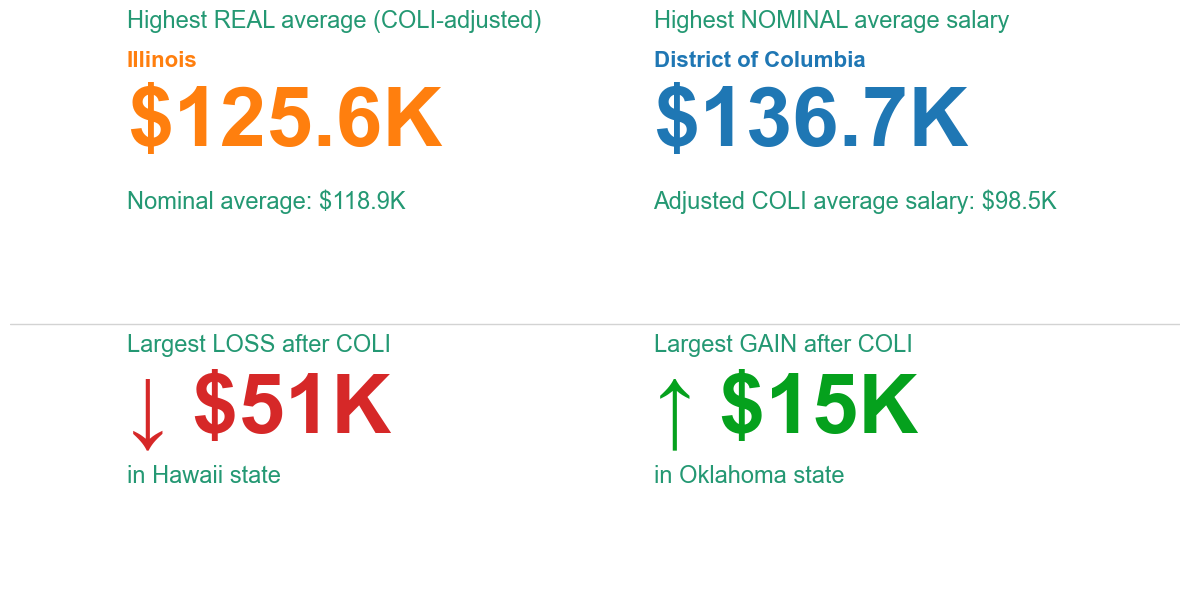

In [42]:
state_avg['loss_amount'] = state_avg['a_mean_24'] - state_avg['a_mean_24_adj']
state_avg['diff'] = state_avg['a_mean_24_adj'] - state_avg['a_mean_24']

highest_adj_row = state_avg.loc[state_avg['a_mean_24_adj'].idxmax()]
highest_nom_row = state_avg.loc[state_avg['a_mean_24'].idxmax()]
biggest_loss_row = state_avg.loc[state_avg['loss_amount'].idxmax()]
biggest_gain_row = state_avg.loc[state_avg['diff'].idxmax()]

highest_state = highest_adj_row['area_title']
highest_adj = highest_adj_row['a_mean_24_adj']
highest_nom = highest_adj_row['a_mean_24']

highest_nom_state = highest_nom_row['area_title']
highest_nom_val = highest_nom_row['a_mean_24']
highest_nom_adj = highest_nom_row['a_mean_24_adj']

biggest_loss_state = biggest_loss_row['area_title']
biggest_loss = biggest_loss_row['loss_amount']

biggest_gain_state = biggest_gain_row['area_title']
biggest_gain = biggest_gain_row['diff']

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.axis("off")

ax.text(0.1, 0.8, f"${highest_adj/1000:.1f}K", fontsize=60, weight="bold",
        color="#ff7f0e", va="center")
ax.text(0.1, 1,
        f"Highest REAL average (COLI-adjusted) ",
        fontsize=17, color="#03895ede", linespacing=1.4,
        ha="left", va="top", weight="regular")
ax.text(0.1, 0.9,
        f"{highest_state}", fontsize=16, color="#ff7f0e", weight="bold")
ax.text(0.1, 0.65, f"Nominal average: ${highest_nom/1000:.1f}K", fontsize=17, color="#03895ede")


ax.text(0.55, 0.8, f"${highest_nom_val/1000:.1f}K", fontsize=60, weight="bold",
        color="#1f77b4", va="center")
ax.text(0.55, 1, 
        f"Highest NOMINAL average salary ", 
        fontsize=17, color="#03895ede", linespacing=1.4,
        ha="left", va="top", weight="regular")
ax.text(0.55, 0.9,
        f"{highest_nom_state}", fontsize=16, color="#1f77b4", weight="bold")
ax.text(0.55, 0.65, f"Adjusted COLI average salary: ${highest_nom_adj/1000:.1f}K", fontsize=17, color="#03895ede")

ax.axhline(0.45, color="lightgray", lw=1)

ax.text(0.1, 0.4, f"Largest LOSS after COLI", 
        fontsize=17, color="#03895ede")
ax.text(0.1, 0.3, f"↓ ${biggest_loss/1000:.0f}K", fontsize=60, weight="bold",
        color="#d62828", va="center")
ax.text(0.1, 0.17, f"in {biggest_loss_state} state", 
        fontsize=17, color="#03895ede")

ax.text(0.55, 0.4, f"Largest GAIN after COLI ", 
        fontsize=17, color="#03895ede")
ax.text(0.55, 0.3, f"↑ ${biggest_gain/1000:.0f}K", fontsize=60, weight="bold",
        color="#05a11d", va="center")
ax.text(0.55, 0.17, f"in {biggest_gain_state} state", 
        fontsize=17, color="#03895ede")


plt.tight_layout()
plt.show()


**Key Insight:**  
Even though *District of Columbia* leads in raw pay, *Illinois* offers the best *real* value when adjusted for living costs — proving that **purchasing power matters more than paycheck size.** While coastal states pay higher on paper, Midwestern states like *Alabama* and *Oklahoma* win on real value after adjusting for cost of living.

We can conduct same research and look at real salaries for each data related position if desired.

In [46]:
!jupyter nbconvert --to html --no-input data608_project4_COLI_adjusted.ipynb


[NbConvertApp] Converting notebook data608_project4_COLI_adjusted.ipynb to html
C:\Users\farho\anaconda3\envs\stl-recsys\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] Writing 1174986 bytes to data608_project4_COLI_adjusted.html
